In [14]:
import pandas as pd
import json
import os
from PIL import Image
import matplotlib.pyplot as plt

In [30]:
train_data_path = 'data/train'
df = pd.read_csv('data/train.csv')

In [31]:
print(set(os.listdir(train_data_path)) - set(df.ID_img))
print(set(df.ID_img) - set(os.listdir(train_data_path)))

{'.DS_Store'}
set()


In [32]:
h_list, w_list = [], []
for img_name in os.listdir(train_data_path):
    if 'JPG' in img_name:
        path = os.path.join(train_data_path, img_name)
        w, h = Image.open(path).size
        h_list.append(h)
        w_list.append(w)

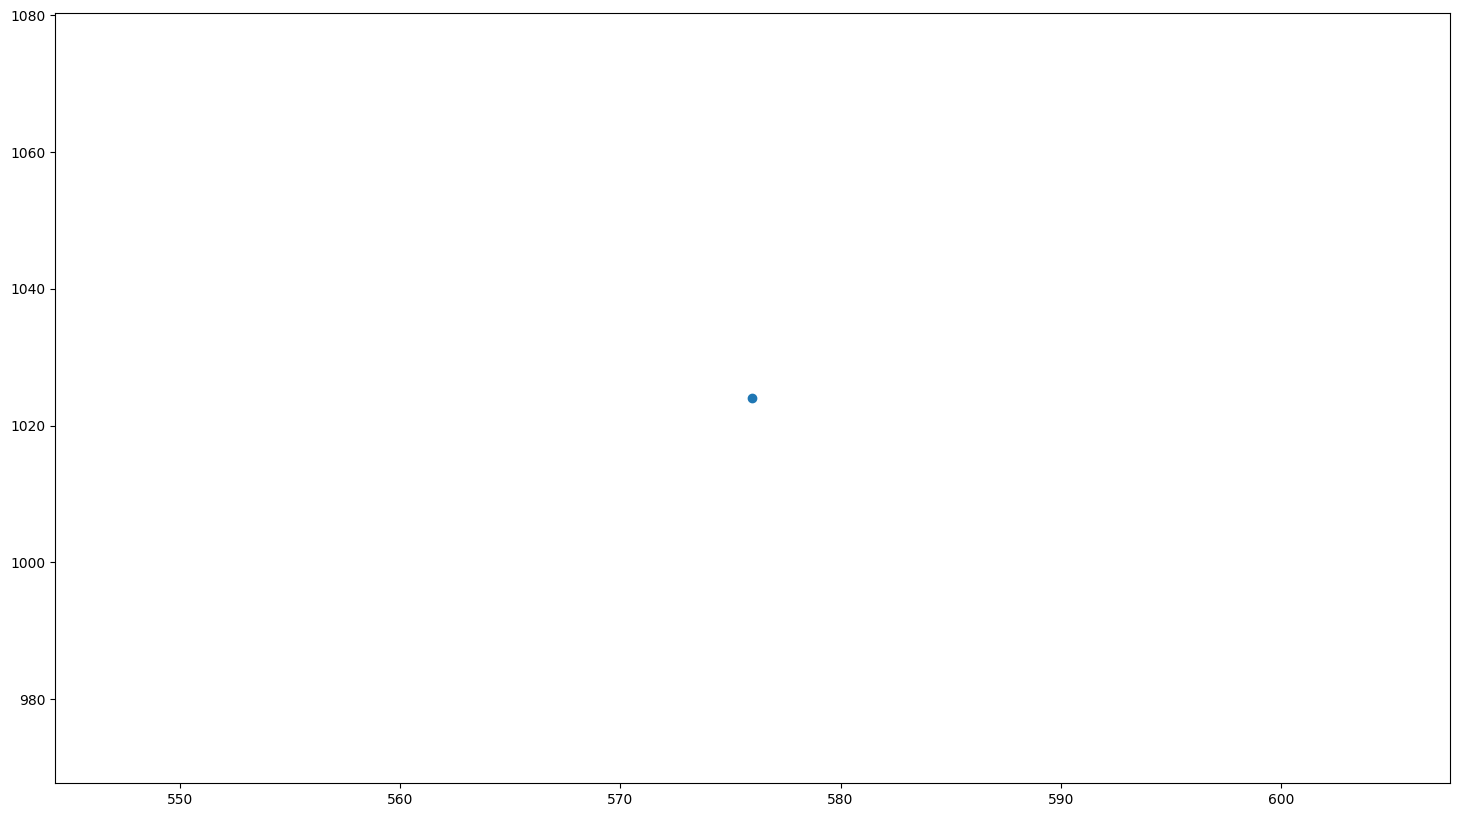

In [33]:
plt.figure(figsize=(18, 10))
plt.scatter(h, w)

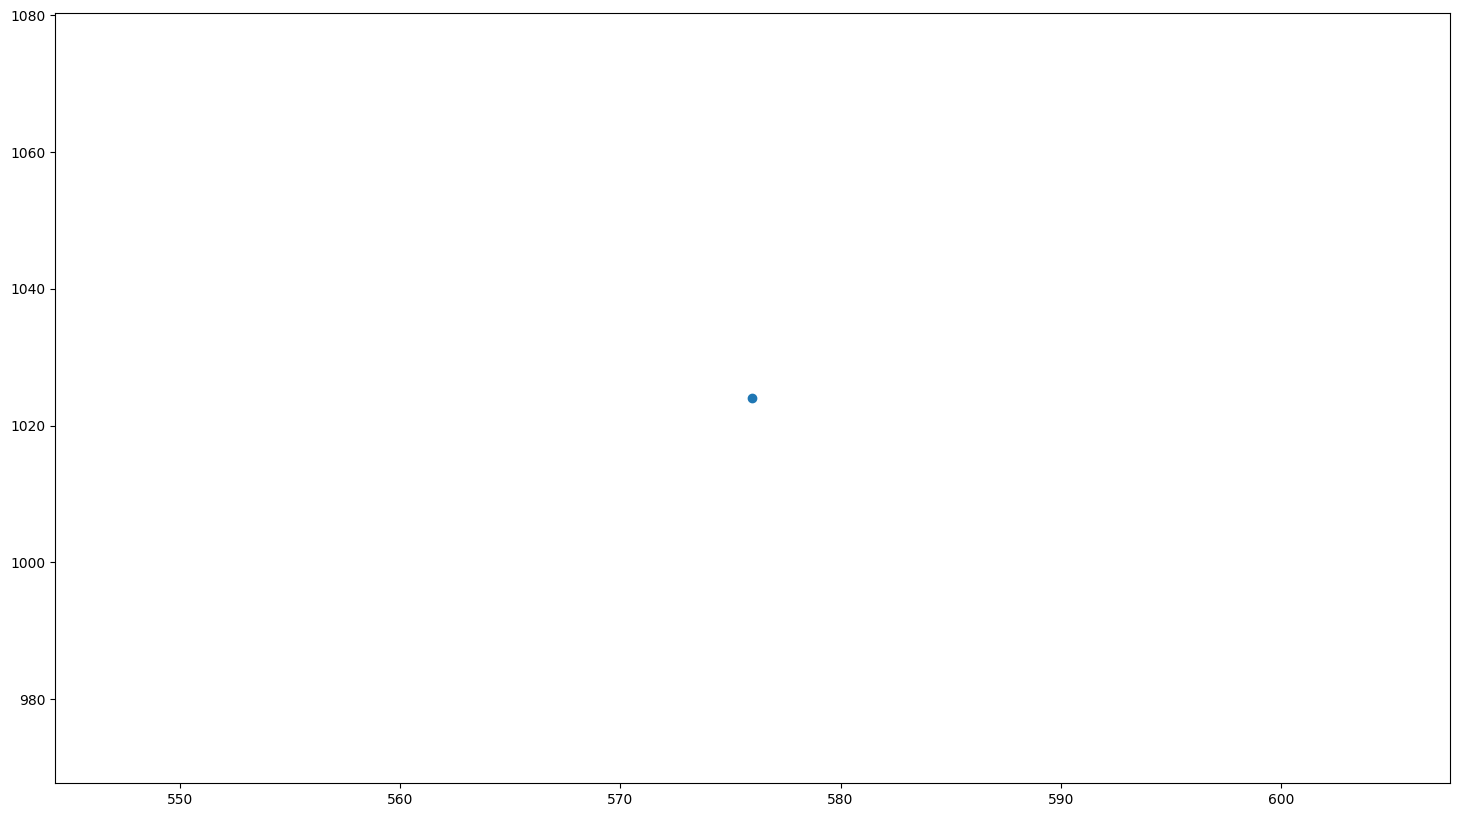

In [34]:
test_data_path = 'data/test'
h_list, w_list = [], []
for img_name in os.listdir(test_data_path):
    if 'JPG' in img_name:
        path = os.path.join(test_data_path, img_name)
        w, h = Image.open(path).size
        h_list.append(h)
        w_list.append(w)
plt.figure(figsize=(18, 10))
plt.scatter(h, w)

In [25]:
df[df.count_region == 2]

,ID_img,count_region,region_shape
399,3835.JPG,2.0,"['{""cx"":2549,""cy"":2329,""r"":80}', '{""cx"":2437,""..."
855,4291.JPG,2.0,"['{""cx"":3467,""cy"":1740,""r"":77}', '{""cx"":3587,""..."
1029,4465.JPG,2.0,"['{""cx"":2735,""cy"":1711,""r"":102}', '{""cx"":2430,..."
1168,4604.JPG,2.0,"['{""cx"":3276,""cy"":1619,""r"":130}', '{""cx"":3114,..."
1344,4780.JPG,2.0,"['{""cx"":3898,""cy"":988,""r"":123}', '{""cx"":3309,""..."
1452,4888.JPG,2.0,"['{""cx"":2188,""cy"":244,""r"":91}', '{""cx"":2237,""c..."
1498,4934.JPG,2.0,"['{""cx"":2890,""cy"":775,""r"":110}', '{""cx"":3045,""..."
1629,5065.JPG,2.0,"['{""cx"":1167,""cy"":1568,""r"":36}', '{""cx"":1268,""..."
1755,5191.JPG,2.0,"['{""cx"":2346,""cy"":2840,""r"":93}', '{""cx"":2217,""..."
1841,5277.JPG,2.0,"['{""cx"":3321,""cy"":924,""r"":50}', '{""cx"":3277,""c..."


In [26]:
json.loads(df[df.ID_img == '5824.JPG'].region_shape.iloc[0].replace("'", ""))

[{'cx': 2902, 'cy': 1824, 'r': 102}, {'cx': 2854, 'cy': 2527, 'r': 92}]

In [27]:
def get_bboxes_from_string(label_string):
    contents = json.loads(label_string.replace("'", ""))
    bboxes_list = []
    if isinstance(contents, list):
        for obj_dict in contents:
            cx = obj_dict['cx']
            cy = obj_dict['cy']
            r = obj_dict['r']
            x_0, x_1 = cx - r, cx + r
            y_0, y_1 = cy - r, cy + r
            bboxes_list.append((x_0, x_1, y_0, y_1))
        return bboxes_list
    else:
        return None

In [29]:
df.region_shape.apply(get_bboxes_from_string)

0       None
1       None
2       None
3       None
4       None
        ... 
5157    None
5158    None
5159    None
5160    None
5161    None
Name: region_shape, Length: 5162, dtype: object

In [1]:
from main import LizaDataset

In [2]:
dataset = LizaDataset('data/train', 'data/train.csv', 1024, 768)

In [3]:
dataset[6]

(array([[[0.61960784, 0.63480392, 0.39754902],
         [0.56519608, 0.58039216, 0.34313725],
         [0.63823529, 0.63872549, 0.40490196],
         ...,
         [0.65637255, 0.61764706, 0.60833333],
         [0.6504902 , 0.59705882, 0.58480392],
         [0.60686275, 0.55343137, 0.54019608]],
 
        [[0.63529412, 0.64852941, 0.41911765],
         [0.56715686, 0.58039216, 0.35098039],
         [0.5872549 , 0.58970588, 0.36176471],
         ...,
         [0.63088235, 0.59411765, 0.57892157],
         [0.63284314, 0.58529412, 0.57107843],
         [0.63431373, 0.58676471, 0.56764706]],
 
        [[0.63382353, 0.64558824, 0.43676471],
         [0.55833333, 0.56862745, 0.35980392],
         [0.51372549, 0.51470588, 0.30735294],
         ...,
         [0.61176471, 0.57647059, 0.55098039],
         [0.61372549, 0.57352941, 0.5504902 ],
         [0.64901961, 0.60882353, 0.58088235]],
 
        ...,
 
        [[0.62598039, 0.67892157, 0.54411765],
         [0.54117647, 0.59019608, 0.475  